> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# III: Logistic Regression

<div style="text-align: right"> **Due date: Nov. 2, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM.** </div> 
<h4><div style="text-align: right"> **For one day late (70% credit), please send your file to your TAs in the form of [ID_Name_HW3.ipynb].**</div> </h4>


### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-10-25 23:43:43.556576


## Problem description

We will implement Stochastic Gradient Descent (SGD) to optimize a logistic regression model to predict whether a given patient have diabetes or not. In clinical informatics, machine learning approahces have been widely adopted to predict clinically adverse events based on patient data. For this problem, we will use the Pima Indians Diabetes Data Set. The data on each patient include:

- $\texttt{label}$: The output class variable (0 - normal or 1 - diabetes)  
- $\texttt{num_preg}$: Number of times pregnant 
- $\texttt{PGC}$: Plasma glucose concentration at 2 hours in an oral glucose tolerance test (PGC)
- $\texttt{DBP}$: Diastolic blood pressure (DBP)
- $\texttt{tricept}$: Triceps skin fold thickness (tricept, unit: mm)  
- $\texttt{insulin}$: 2-Hour serum insulin (insulin, unit: μU/ml)
- $\texttt{BMI}$: Body mass index (BMI)
- $\texttt{ped_func}$: Diabetes pedigree function
- $\texttt{age}$: Age (age, years)

Among all 768 patients, we will separate 500 patients as training data ($\texttt{logistic_regression_training_data.csv}$) and 268 patients as test data ($\texttt{logistic_regression_test_data.csv}$).

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#set all data
df = pd.read_csv('logistic_regression_training_data.csv')
df = df.values

x = np.delete(df, 0, 1) 
intercept = np.ones((500,1))
x = np.column_stack([intercept, x])

y = np.array(df[0][0])
for i in range(1,500):
    y = np.row_stack((y, df[i][0])) 
    
df = pd.read_csv('logistic_regression_testing_data.csv') 
df = df.values

x_t = np.delete(df, 0, 1) 
intercept = np.ones((268,1))
x_t = np.column_stack([intercept, x_t])

y_t = np.array(df[0][0])
for i in range(1,268):
    y_t = np.row_stack((y_t, df[i][0]))

### I. Logistic regression method using SGD
(*50 points*) P1.1 Implement a logistic regression method using SGD. You may assume that the data is randomly ordered. 

(*10 points*) P1.2 Plot $\bar L$ every 100 iterations, e.g., [100, 200, 300,...], defined as

$\begin{equation} \bar L(T) = \frac{1}{T}\sum_{t=1}^{T} (\hat y^t - y^t)^2 \end{equation}$,   
where $T$ is the number of iterations and $\hat y^t$ (either 0 or 1) is the predicted label for sample $\bf{x}^t$ using the weights $\bf{w}^{t-1}$. 

> Initialize the weight vector $w$ and the bias $w_0$ to 0.    
> Learning rate = 0.8.    
> Number of iterations = 100,000.

(*10 points*) P1.3 Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Plot sum of squared errors of your prediction.

In [195]:
def set_y (y): 
    if(y >= 0.5):
        return 1
    else:
        return 0

def sgd (lr, x, y, w):
    it = 0
    LT = []
    diff = 0
    x_axis = []
    err = []
    w_avg = np.copy(w)
    for t in range(200):
        for i in range(x.shape[0]):
            it += 1 #iteration
            y_pre = 1 / (1 + math.exp(-np.dot(x[i],w.T)[0])) 
            y_pre = set_y(y_pre) #prediction of y with w^(t-1)
            diff = diff + pow((y[i] - y_pre),2) #L(T) without division of T
            
            if(i%100 == 99):
                LT.append(diff[0]/it) #append LT every 100 iterations - P1.2
                x_axis.append(it)
                
                y_pre_arr = 1 / (1 + np.exp(-np.dot(x_t,w.T)))
                for a in range(y_pre_arr.shape[0]):
                    y_pre_arr[a] = set_y(y_pre_arr[a])
                tr_err = np.dot((y_t - y_pre_arr).T, y_t - y_pre_arr) #sum of squared errors - P1.3
                err.append(tr_err[0][0])
                
                
            for j in range(x.shape[1]): #update w with partial_j
                partial_j = x[i][j]*(y[i] - 1 / (1 + math.exp(-np.dot(x[i],w.T)[0])))
                w[0][j] = w[0][j] + lr * partial_j[0]
            
            
            if(it > 99000): #for P2.2
                w_avg = w_avg + w
            
    p2 = plt.plot(x_axis, LT)
    plt.ylabel('L_Bar')
    plt.show(p2)
    p3 = plt.plot(x_axis, err)
    plt.ylabel('sum of squared errors')
    plt.show(p3)
    return [w, w_avg/1000]

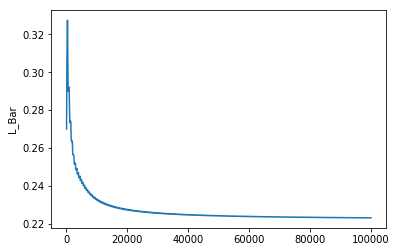

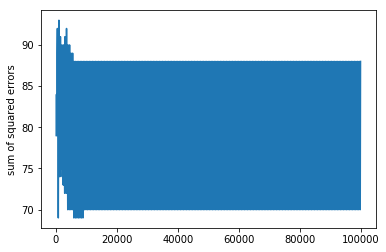

[array([[-8.99574593,  3.98101182, 10.90184574, -0.95646014, -0.44369638,
        -1.2642214 ,  3.82599362,  2.15763631,  0.69545295]]), array([[-9.62496928,  3.58243412, 10.66208901, -1.25655879,  0.14413935,
        -1.10868757,  3.89445316,  1.95812292, -0.01218709]])]


In [196]:
w = np.zeros((1,9))
w = sgd(0.8, x, y, w)
print(w)

# Description
### P1.1
강의자료 10장 8page에 있는 pseudo code를 이용해서 partial[j]를 구해주면서 w를 업데이트해주었다. iteration은 100,000번으로 for-loop를 500(data set)개씩 200번 돌려주었다. stochastic gradient에서는 random으로 x값을 하나 뽑아서 partial을 구해야하지만 이번 과제에서는 데이터가 ramdom하게 분포되어 있다는 가정을 하고 풀어서 순차적으로 대입해주었다.
probability는 1 / (1 + math.exp(-np.dot(x[i],w.T)[0]))) 이와 같이 sigmoid 함수를 이용해서 구했고 indicator는 사실상 y값이 0과 1이어서 y값 자체를 써주면 된다. 중간에 probability를 이용해서 y값을 0과 1로 만들어주는 set_y함수를 처음에 만들어놔서 필요할때마다 사용했다.

### P1.2
iteration을 100으로 modulation해줬을 때 99이면 L(T)를 구해서 LT라는 리스트에 넣어주었다. 그래프는 결과에 y좌표가 L_Bar인 그래프이고 iteration이 증가 할수록 0.22정도로 수렴하는 것을 볼 수 있었다.

### P1.3
test set을 이용해서 iteration이 100번 될 때마다 test 값의 예상값과 실제값의 차의 제곱을 구해주었다. 주석으로 #sum of squared errors - P1.3 이렇게 표시한 부분입니다. noise가 심하게 나왔으며 범위는 70~90으로 나왔다.

### II. Model evaluation and feature interpretations 
(*10 points*) P2.1 Using the model after 100,000 iterations, measure test accuracy. Accuracy is the fraction of predictions our model got right. That is, it is computed by Number of correct predictions / Total number of predictions.

(*10 points*) P2.2 SGD oscillates around a solution (noisy convergence). In order to minimize risk of picking bad weights, we typically use an average model. Measure test accuracy again, using an average model over the weights for the last 1000 iterations

(*10 points*) P2.3 Report the weights of following features, $\texttt{BMI}$, $\texttt{insulin}$, and $\texttt{PGC}$, and provide an interpretation of the effect of these features for diabetes classification based on the inferred weights.

In [186]:
#P2.1
y_test = 1 / (1 + np.exp(-np.dot(x_t,w[0].T)))
# print(y_test)
for a in range(y_test.shape[0]):
    y_test[a] = set_y(y_test[a])
        
accuracy = y_t - y_test
print(1- np.count_nonzero(accuracy)/268)

0.664179104477612


In [197]:
#P2.2
y_test = 1 / (1 + np.exp(-np.dot(x_t,w[1].T)))
# print(y_test)
for a in range(y_test.shape[0]):
    y_test[a] = set_y(y_test[a])
        
accuracy = y_t - y_test
print(1- np.count_nonzero(accuracy)/268)

0.7164179104477613


# Description
### P2.1
최종 w값으로 y의 예상값을 구해주었고 이 값들을 y의 실제 값과 비교했다. 이 때 두 vector를 빼서 nonzero인 값을 count해서 accuracy를 구할 수 있었다. 0.66으로 나왔다.

### P2.2
Problem 1 코드에 아래 코드를 추가해 마지막 1000 iteration 일 때 w값들을 모두더해 마지막으로 return할 때 1000으로 나눠서 w의 평균을 구했다 <br>
if(it > 99000): #for P2.2 <br>
  w_avg = w_avg + w <br>
accuracy가 좀 더 올라간 것을 볼 수 있다(0.716).

### P2.3
w = [-8.99574593,  3.98101182, <b>10.90184574</b>, -0.95646014, -0.44369638, <b>-1.2642214 ,  3.82599362</b>,  2.15763631,  0.69545295]<br>
w_average = [-9.62496928,  3.58243412, <b>10.66208901</b>, -1.25655879,  0.14413935, <b>-1.10868757,  3.89445316</b>,  1.95812292, -0.01218709]

최종으로 구한 w와 마지막 1000번 iteration에서 w의 결과로 평균을 낸 w_avg이다. 이 값들 중 bold로 되어있는 값들은 각각 순서대로 PGC, insulin, BMI feature들이 w값들이다. w값들로 분석을 해보면 PGC가 조금만 올라가도 diabetes이 될 확률이 높아진다고 볼 수 있다. 반면 insulin에 대한 weight는 음수가 나왔는데 insulin은 높아질 수록 diabetes가 될 확률이 낮아진다. 마지막으로 BMI는 3.8x가 나왔는데, BMI가 높아질 수록 diabetes가 걸릴 확률이 높아지지만 PGC만큼 큰 영향을 주지않는다고 볼 수 있다. 

p2.3에서 weight을 출력하지 않아서 5점 감점입니다.
